# Bike Sharing Demand

Access competition [here](https://www.kaggle.com/c/bike-sharing-demand/)

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [67]:
train['datetime']=pd.to_datetime(train['datetime'])

In [68]:
train['year'] = train['datetime'].apply(lambda x:x.year)
train['month']= train['datetime'].apply(lambda x:x.month)
train['day']= train['datetime'].apply(lambda x:x.day)
train['hour']= train['datetime'].apply(lambda x:x.hour)

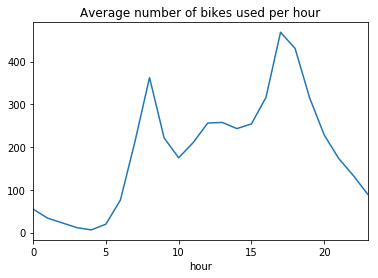

In [32]:
train.groupby(['hour']).mean()['count'].plot(title='Average number of bikes used per hour')

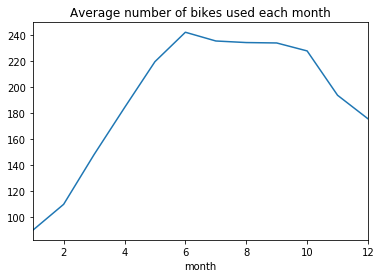

In [46]:
train.groupby(['month']).mean()['count'].plot(title='Average number of bikes used each month')

In [42]:
train.groupby(['month','hour']).mean()

season   holiday  workingday   weather       temp      atemp  \
month hour                                                                 
1     0        1.0  0.081081    0.621622  1.351351   9.396757  12.060000   
      1        1.0  0.081081    0.621622  1.405405   9.064324  11.445405   
      2        1.0  0.083333    0.611111  1.416667   8.906111  11.300694   
      3        1.0  0.076923    0.500000  1.346154   8.862308  11.567692   
      4        1.0  0.088235    0.588235  1.529412   8.706471  10.985000   
      5        1.0  0.083333    0.638889  1.527778   8.131667  10.417083   
      6        1.0  0.081081    0.621622  1.540541   7.911892  10.217162   
      7        1.0  0.081081    0.621622  1.405405   7.734595  10.237703   
      8        1.0  0.081081    0.621622  1.351351   7.867568  10.135270   
      9        1.0  0.081081    0.621622  1.378378   8.155676  10.319459   
      10       1.0  0.081081    0.621622  1.378378   8.909189  10.995405   
      11       1.0  0.081081    0.621622  1.351351   9.972973  11.773108   
      12       1.0  0.078947    0.631579  1.368421  10.638421  12.540000   
      13       1.0  0.078947    0.631579  1.342105  11.523158  13.476711   
      14       1.0  0.078947    0.631579  1.342105  11.868421  13.975000   
      15       1.0  0.078947    0.631579  1.342105  12.192105  14.254342   
      16       1.0  0.078947    0.631579  1.368421  12.062632  14.154605   
      17       1.0  0.078947    0.631579  1.368421  11.695789  13.795789   
      18       1.0  0.078947    0.631579  1.447368  11.307368  13.456974   
      19       1.0  0.078947    0.631579  1.447368  10.681579  13.098289   
      20       1.0  0.078947    0.631579  1.342105  10.379474  12.798684   
      21       1.0  0.078947    0.631579  1.368421  10.055789  12.281184   
      22       1.0  0.078947    0.631579  1.473684   9.732105  11.981579   
      23       1.0  0.078947    0.631579  1.421053   9.581053  11.942105   
2     0        1.0  0.000000    0.710526  1.473684  10.940526  13.676184   
      1        1.0  0.000000    0.710526  1.526316  10.638421  13.456711   
      2        1.0  0.000000    0.702703  1.513514  10.371892  13.186351   
      3        1.0  0.000000    0.676471  1.588235  10.418824  13.413824   
      4        1.0  0.000000    0.666667  1.575758  10.436364  12.993939   
      5        1.0  0.000000    0.729730  1.513514   9.596216  12.141892   
...            ...       ...         ...       ...        ...        ...   
11    18       4.0  0.052632    0.657895  1.263158  16.507895  19.815921   
      19       4.0  0.052632    0.657895  1.263158  16.033158  19.397368   
      20       4.0  0.052632    0.657895  1.289474  15.558421  18.799342   
      21       4.0  0.052632    0.657895  1.342105  15.191579  18.460263   
      22       4.0  0.052632    0.657895  1.263158  14.673684  17.742763   
      23       4.0  0.052632    0.657895  1.263158  14.285263  17.423553   
12    0        4.0  0.000000    0.684211  1.394737  13.076842  16.407105   
      1        4.0  0.000000    0.684211  1.421053  12.753158  16.048684   
      2        4.0  0.000000    0.684211  1.447368  12.666842  16.147632   
      3        4.0  0.000000    0.684211  1.473684  12.213684  15.589474   
      4        4.0  0.000000    0.684211  1.500000  12.084211  15.410132   
      5        4.0  0.000000    0.684211  1.500000  12.041053  15.410263   
      6        4.0  0.000000    0.684211  1.526316  11.738947  14.852237   
      7        4.0  0.000000    0.684211  1.526316  11.738947  14.732500   
      8        4.0  0.000000    0.684211  1.552632  12.084211  15.271184   
      9        4.0  0.000000    0.684211  1.473684  12.904211  15.828816   
      10       4.0  0.000000    0.684211  1.526316  13.745789  16.726053   
      11       4.0  0.000000    0.684211  1.578947  14.501053  17.463816   
      12       4.0  0.000000    0.684211  1.578947  15.170000  18.281184   
      13       4.0  0.000000    0.684211  1.552632  15.90368

## Preprocessing

Remove features

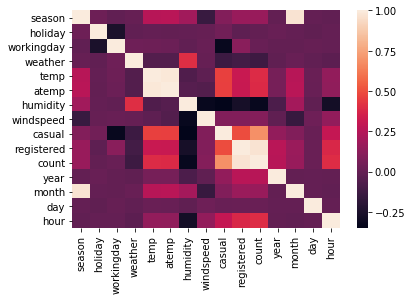

In [69]:
sns.heatmap(train.corr())

Let's drop the features that are collinear.

In [71]:
#drop collinear
train = train.drop(['temp'])

Drop N/A

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


Standardize

In [94]:
from sklearn.preprocessing import StandardScaler

X = train.drop(['datetime','count','casual','registered'],axis=1)
y = train['count']
y_full = train[['casual','registered']]

scaler = StandardScaler()
scaler = scaler.fit(X)
Xn = scaler.transform(X)
Xn = pd.DataFrame(Xn,columns=X.columns)

Xn['season'] = X['season'].astype('category')
Xn['holiday'] = X['holiday'].astype('category')
Xn['workingday'] = X['workingday'].astype('category')
Xn['year'] = X['year'].astype('category')
Xn['month'] = X['month'].astype('category')
Xn['day'] = X['day'].astype('category')
Xn['hour'] = X['hour'].astype('category')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [95]:
Xn.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,2011,1,1,0
1,1,0,0,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,2011,1,1,1
2,1,0,0,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,2011,1,1,2
3,1,0,0,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,2011,1,1,3
4,1,0,0,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,2011,1,1,4


One-hot encoding

In [96]:
Xn = pd.get_dummies(Xn)

In [97]:
Xn.columns

Index(['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'year_2011', 'year_2012', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')

Data split

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn,y,test_size=0.2)


## Modeling

**LINEAR MODELS**

Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)

print('score',lr.score(X_test,y_test))
print('RMSE',mean_squared_error(y_test,lr.predict(X_test)))

score 0.6805773385984386
RMSE 10166.80895544215


Lasso:

In [111]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

print('score',lasso.score(X_test,y_test))
print('RMSE',mean_squared_error(y_test,lasso.predict(X_test)))

score 0.6704560610866617
RMSE 10488.956089260835


Ridge:

In [113]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

print('score',ridge.score(X_test,y_test))
print('RMSE',mean_squared_error(y_test,ridge.predict(X_test)))

score 0.6807056177320019
RMSE 10162.725997025282


**ENSEMBLIST MODELS**

Random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

my_forest = RandomForestClassifier()
my_forest = my_forest.fit(X_train,y_train)

print('Score:', my_forest.score(X_test,y_test))
print('RMSE:', mean_squared_error(y_test,my_forest.predict(X_test)))


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.025252525252525252
RMSE: 18293.197887970615


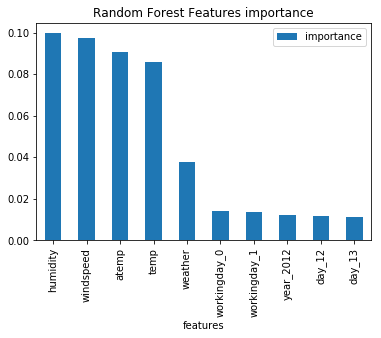

In [122]:
forest_viz = pd.DataFrame()
forest_viz['features'] = X_train.columns
forest_viz['importance'] = my_forest.feature_importances_
forest_viz = forest_viz.sort_values(by=['importance'],ascending=False)[:10]
forest_viz = forest_viz.set_index('features')
forest_viz.plot(kind='bar',title='Random Forest Features importance')


In [124]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
'n_estimators': range(1,50),
'max_features': range(1,X_train.columns.size),
'max_depth': range(1,20),
'min_samples_split': range(2,20),
'min_samples_leaf':range(2,20),
}

my_forest_cv = RandomizedSearchCV(my_forest, param_dist, n_jobs=2,cv=5)
my_forest_cv = my_forest_cv.fit(X_train,y_train)

print("score of the tuned forest: ", my_forest_cv.score(X_train,y_train))
print("RMSE: ", mean_squared_error(y_train,my_forest_cv.predict(X_train)),'\n')
print("Best parameters: ", my_forest_cv.best_params_,'\n')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped whil

score of the tuned forest:  0.423977951309141
RMSE:  7624.543982544787 

Best parameters:  {'n_estimators': 33, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 49, 'max_depth': 17} 



Gradient Boosting (XgBoost)

In [123]:
import xgboost as xgb

my_boost = xgb.XGBClassifier()
my_boost = my_boost.fit(X_train,y_train)

print("score of the xgboost: ", my_boost.score(X_test,y_test))
print("RMSE: ", mean_squared_error(y_test,my_boost.predict(X_test)))



KeyboardInterrupt: 

In [134]:
train.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [139]:
plt.plot(pd.rolling_mean(train['count'],60))

AttributeError: module 'pandas' has no attribute 'rolling_mean'

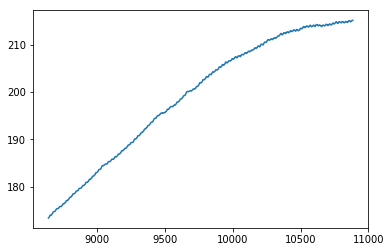

In [149]:
plt.plot(train['count'].rolling(24*360).mean())